In [1]:
# Importing Libraries

import numpy as np 
import pandas as pd 
from math import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import io
import os
import itertools

from PIL import Image
import plotly.offline as py
py.init_notebook_mode(connected=True)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold

import warnings
warnings.filterwarnings("ignore")

In [2]:
telcom_df = pd.read_csv("telecom_churn.csv")
telcom_test = pd.read_csv("telecom_churn_test.csv")

In [3]:
# Check first 5 records
telcom_df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [4]:
# Check last 5 records
telcom_df.tail()

State  Account length  Area code International plan Voice mail plan  \
3328    AZ             192        415                 No             Yes   
3329    WV              68        415                 No              No   
3330    RI              28        510                 No              No   
3331    CT             184        510                Yes              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
3328                 9.9                 6               2.67   
3329                 9.6                 4               2.59   
3330                14.1                 6               3.81   
3331                 5.0                10               1.35   
3332                13.7                 4               3.70   

      Customer service calls  Churn  
3328                       2  False  
3329                       3  False  
3330                       2  False  
3331                       2  False  
3332                       0  False

In [5]:
# Check the dimension of the dataframe
telcom_df.shape

(3333, 20)

There are 3333 records with 20 features.

In [6]:
# Check if there is any missing values
telcom_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

We can see that there are no missing values in the dataset.

In [7]:
# Check summary statistics of numerical features
telcom_df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [8]:
telcom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

# 2. Exploratory Data Analysis

## 2.1 Customer Churn in Data

In [9]:
trace = go.Pie(labels = telcom_df["Churn"].value_counts().keys().tolist(), 
               values = telcom_df["Churn"].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue','lime'],
               line = dict(color="white", width=1.3)), rotation=90, hoverinfo="label+value+text", hole=.5)

layout = go.Layout(dict(title = "Customer churn in training data", plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",))

data = [trace]

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

## 2.2 Univariate Visualization

### 2.1.1 Quantitative Features

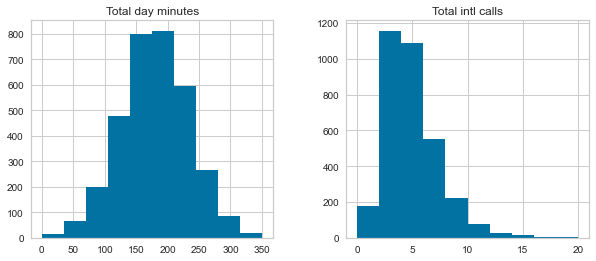

In [10]:
features = ["Total day minutes", "Total intl calls"]
telcom_df[features].hist(figsize=(10, 4));

In the above plot, we see that the variable Total day minutes is normally distributed, while Total intl calls is prominently skewed right (its tail is longer on the right).

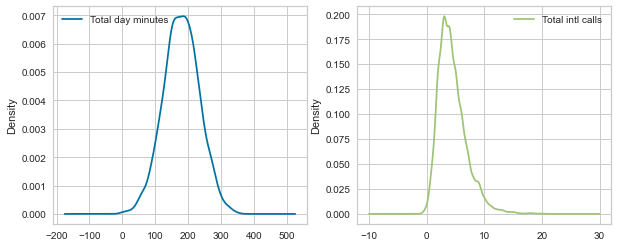

In [11]:
telcom_df[features].plot(kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4));

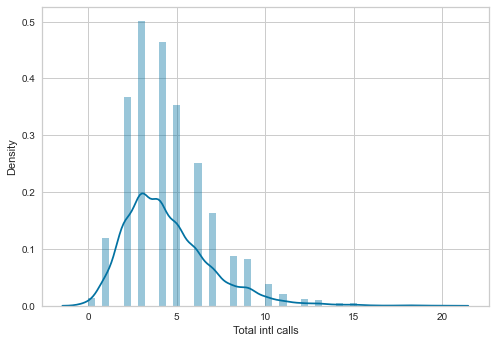

In [12]:
sns.distplot(telcom_df["Total intl calls"]);

The height of the histogram bars here is normed and shows the density rather than the number of examples in each bin.

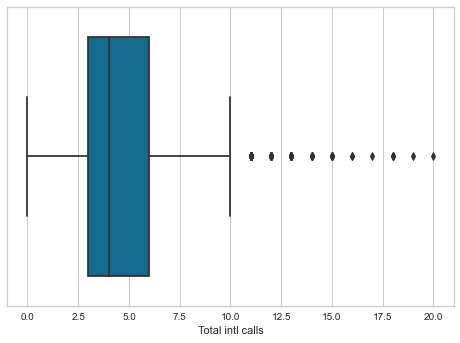

In [13]:
sns.boxplot(x="Total intl calls", data=telcom_df);

We can see that a large number of international calls is quite rare in our data.

### 2.3 Categorical and binary features

Let's check the class balance in our dataset by looking at the distribution of the target variable: the churn rate. First, we will get a frequency table, which shows how frequent each value of the categorical variable is. For this, we will use the value_counts() method:

In [14]:
telcom_df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In our case, the data is not balanced; that is, our two target classes, loyal and disloyal customers, are not represented equally in the dataset. Only a small part of the clients canceled their subscription to the telecom service.

Let's plot the distributions for two categorical variables:

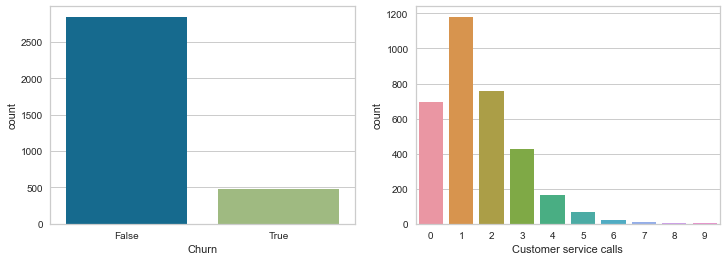

In [15]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=telcom_df, ax=axes[0])
sns.countplot(x="Customer service calls", data=telcom_df, ax=axes[1]);

The left chart above vividly illustrates the imbalance in our target variable. The bar plot for Customer service calls on the right gives a hint that the majority of customers resolve their problems in maximum 2-3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. It may well be that the tail of that bar plot contains most of our churn. These are just hypotheses for now, so let's move on to some more interesting and powerful visual techniques.

## 2.4 Multivariate Visualization

### 2.4.1 Quantitative vs. Quantitative

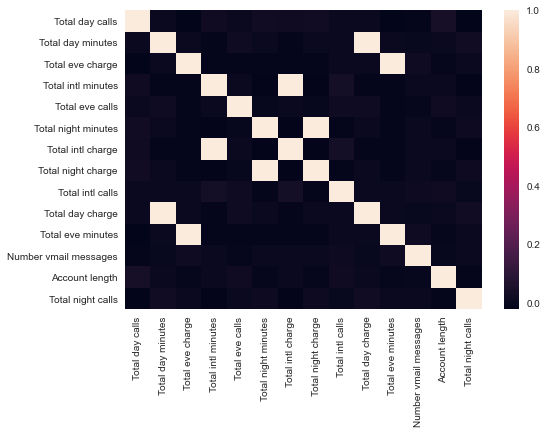

In [16]:
# Drop non-numerical variables
numerical = list(
    set(telcom_df.columns)
    - {
        "State",
        "International plan",
        "Voice mail plan",
        "Area code",
        "Churn",
        "Customer service calls",
    }
)

# Calculate and plot
corr_matrix = telcom_df[numerical].corr()
sns.heatmap(corr_matrix);

From the colored correlation matrix generated above, we can see that there are 4 variables such as Total day charge that have been calculated directly from the number of minutes spent on phone calls (Total day minutes). These are called dependent variables and can therefore be left out since they do not contribute any additional information. Let's get rid of them:

In [17]:
numerical = list(
    set(numerical)
    - {
        "Total day charge",
        "Total eve charge",
        "Total night charge",
        "Total intl charge",
    }
)

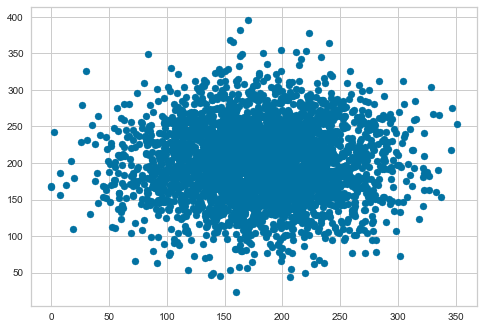

In [18]:
# Scatter plot
plt.scatter(telcom_df["Total day minutes"], telcom_df["Total night minutes"]);

We get an uninteresting picture of two normally distributed variables. Also, it seems that these features are uncorrelated because the ellipse-like shape is aligned with the axes.

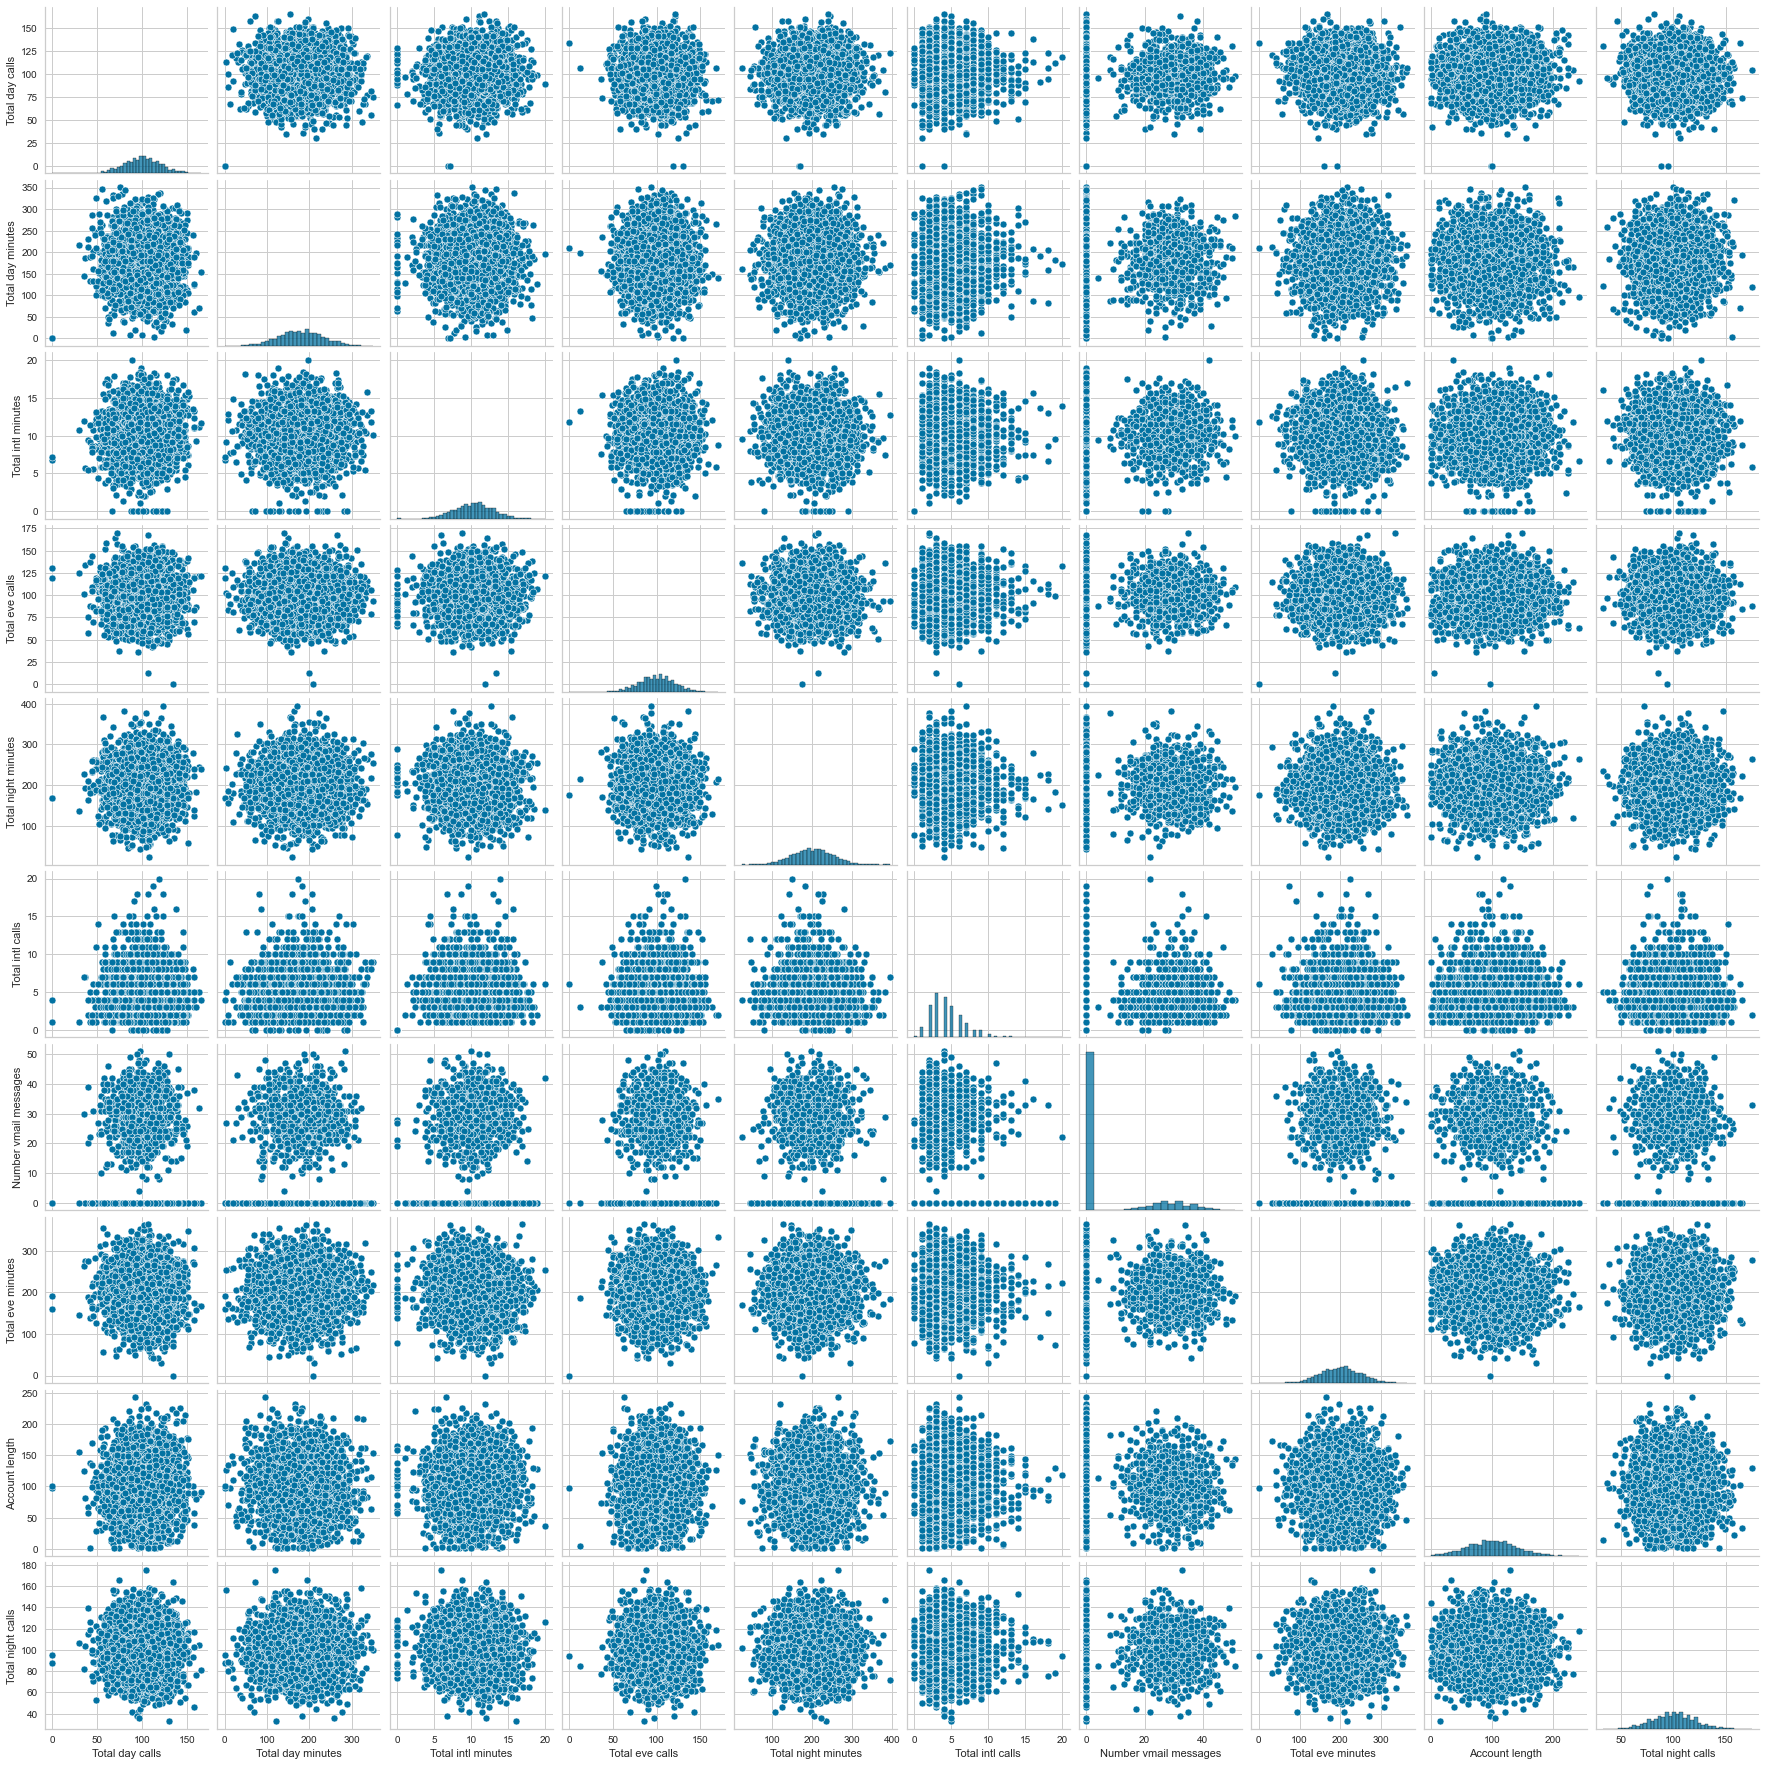

In [19]:
# Scatterplot matrix
# 'pairplot()' may become very slow with the SVG or retina format
%config InlineBackend.figure_format = 'png'
sns.pairplot(telcom_df[numerical]);

### 2.4.2 Quantitative vs. Categorical

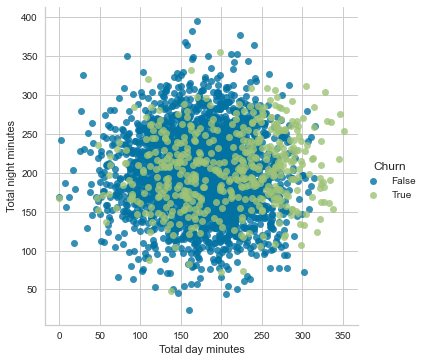

In [20]:
sns.lmplot("Total day minutes", "Total night minutes", data=telcom_df, hue="Churn", fit_reg=False);

It seems that our small proportion of disloyal customers lean towards the top-right corner; that is, such customers tend to spend more time on the phone during both day and night

Let's create box plots to visualize the distribution statistics of the numerical variables in two disjoint groups: the loyal customers (Churn=False) and those who left (Churn=True).

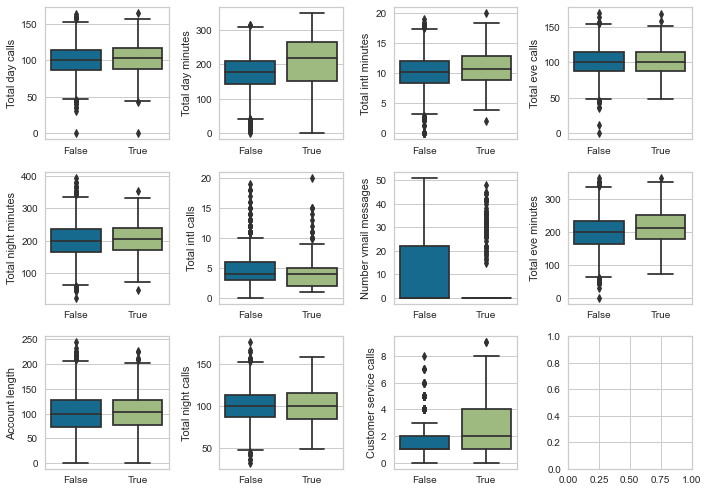

In [21]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=telcom_df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

### 2.4.3 Categorical vs. Categorical

Let's look at the distribution of the number of calls to customer service, again using a count plot. 

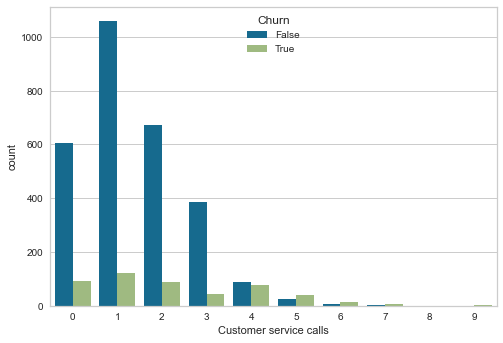

In [22]:
sns.countplot(x="Customer service calls", hue="Churn", data=telcom_df);

The churn rate increases significantly after 4 or more calls to customer service.

Now, let's look at the relationship between Churn and the binary features, International plan and Voice mail plan.

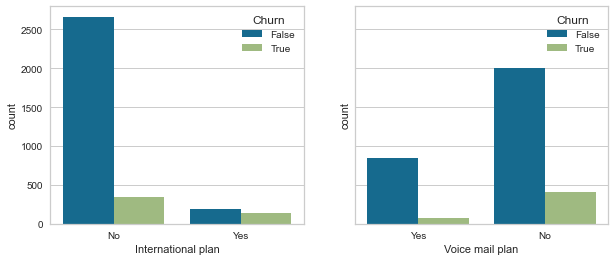

In [23]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x="International plan", hue="Churn", data=telcom_df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=telcom_df, ax=axes[1]);

When International Plan is enabled, the churn rate is much higher; the usage of the international plan by the customer is a strong feature. We do not observe the same effect with Voice mail plan.

In [24]:
# Contingency table
# Let's try to see how Churn is related to the categorical variable State by creating a cross tabulation:
pd.crosstab(telcom_df["State"], telcom_df["Churn"]).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

In the case of State, the number of distinct values is rather high: 51. We see that there are only a few data points available for each individual state – only 3 to 17 customers in each state abandoned the operator. Let's ignore that for a second and calculate the churn rate for each state, sorting it from high to low:

In [25]:
telcom_df.groupby(["State"])["Churn"].agg([np.mean]).sort_values(by="mean", ascending=False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME  ...        RI        WI        IL  \
mean   0.212121  0.212121  0.209677  ...  0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

At first glance, it seems that the churn rate in New Jersey and California are above 25% and less than 6% for Hawaii and Alaska.

## 2.5 Variable Distribution

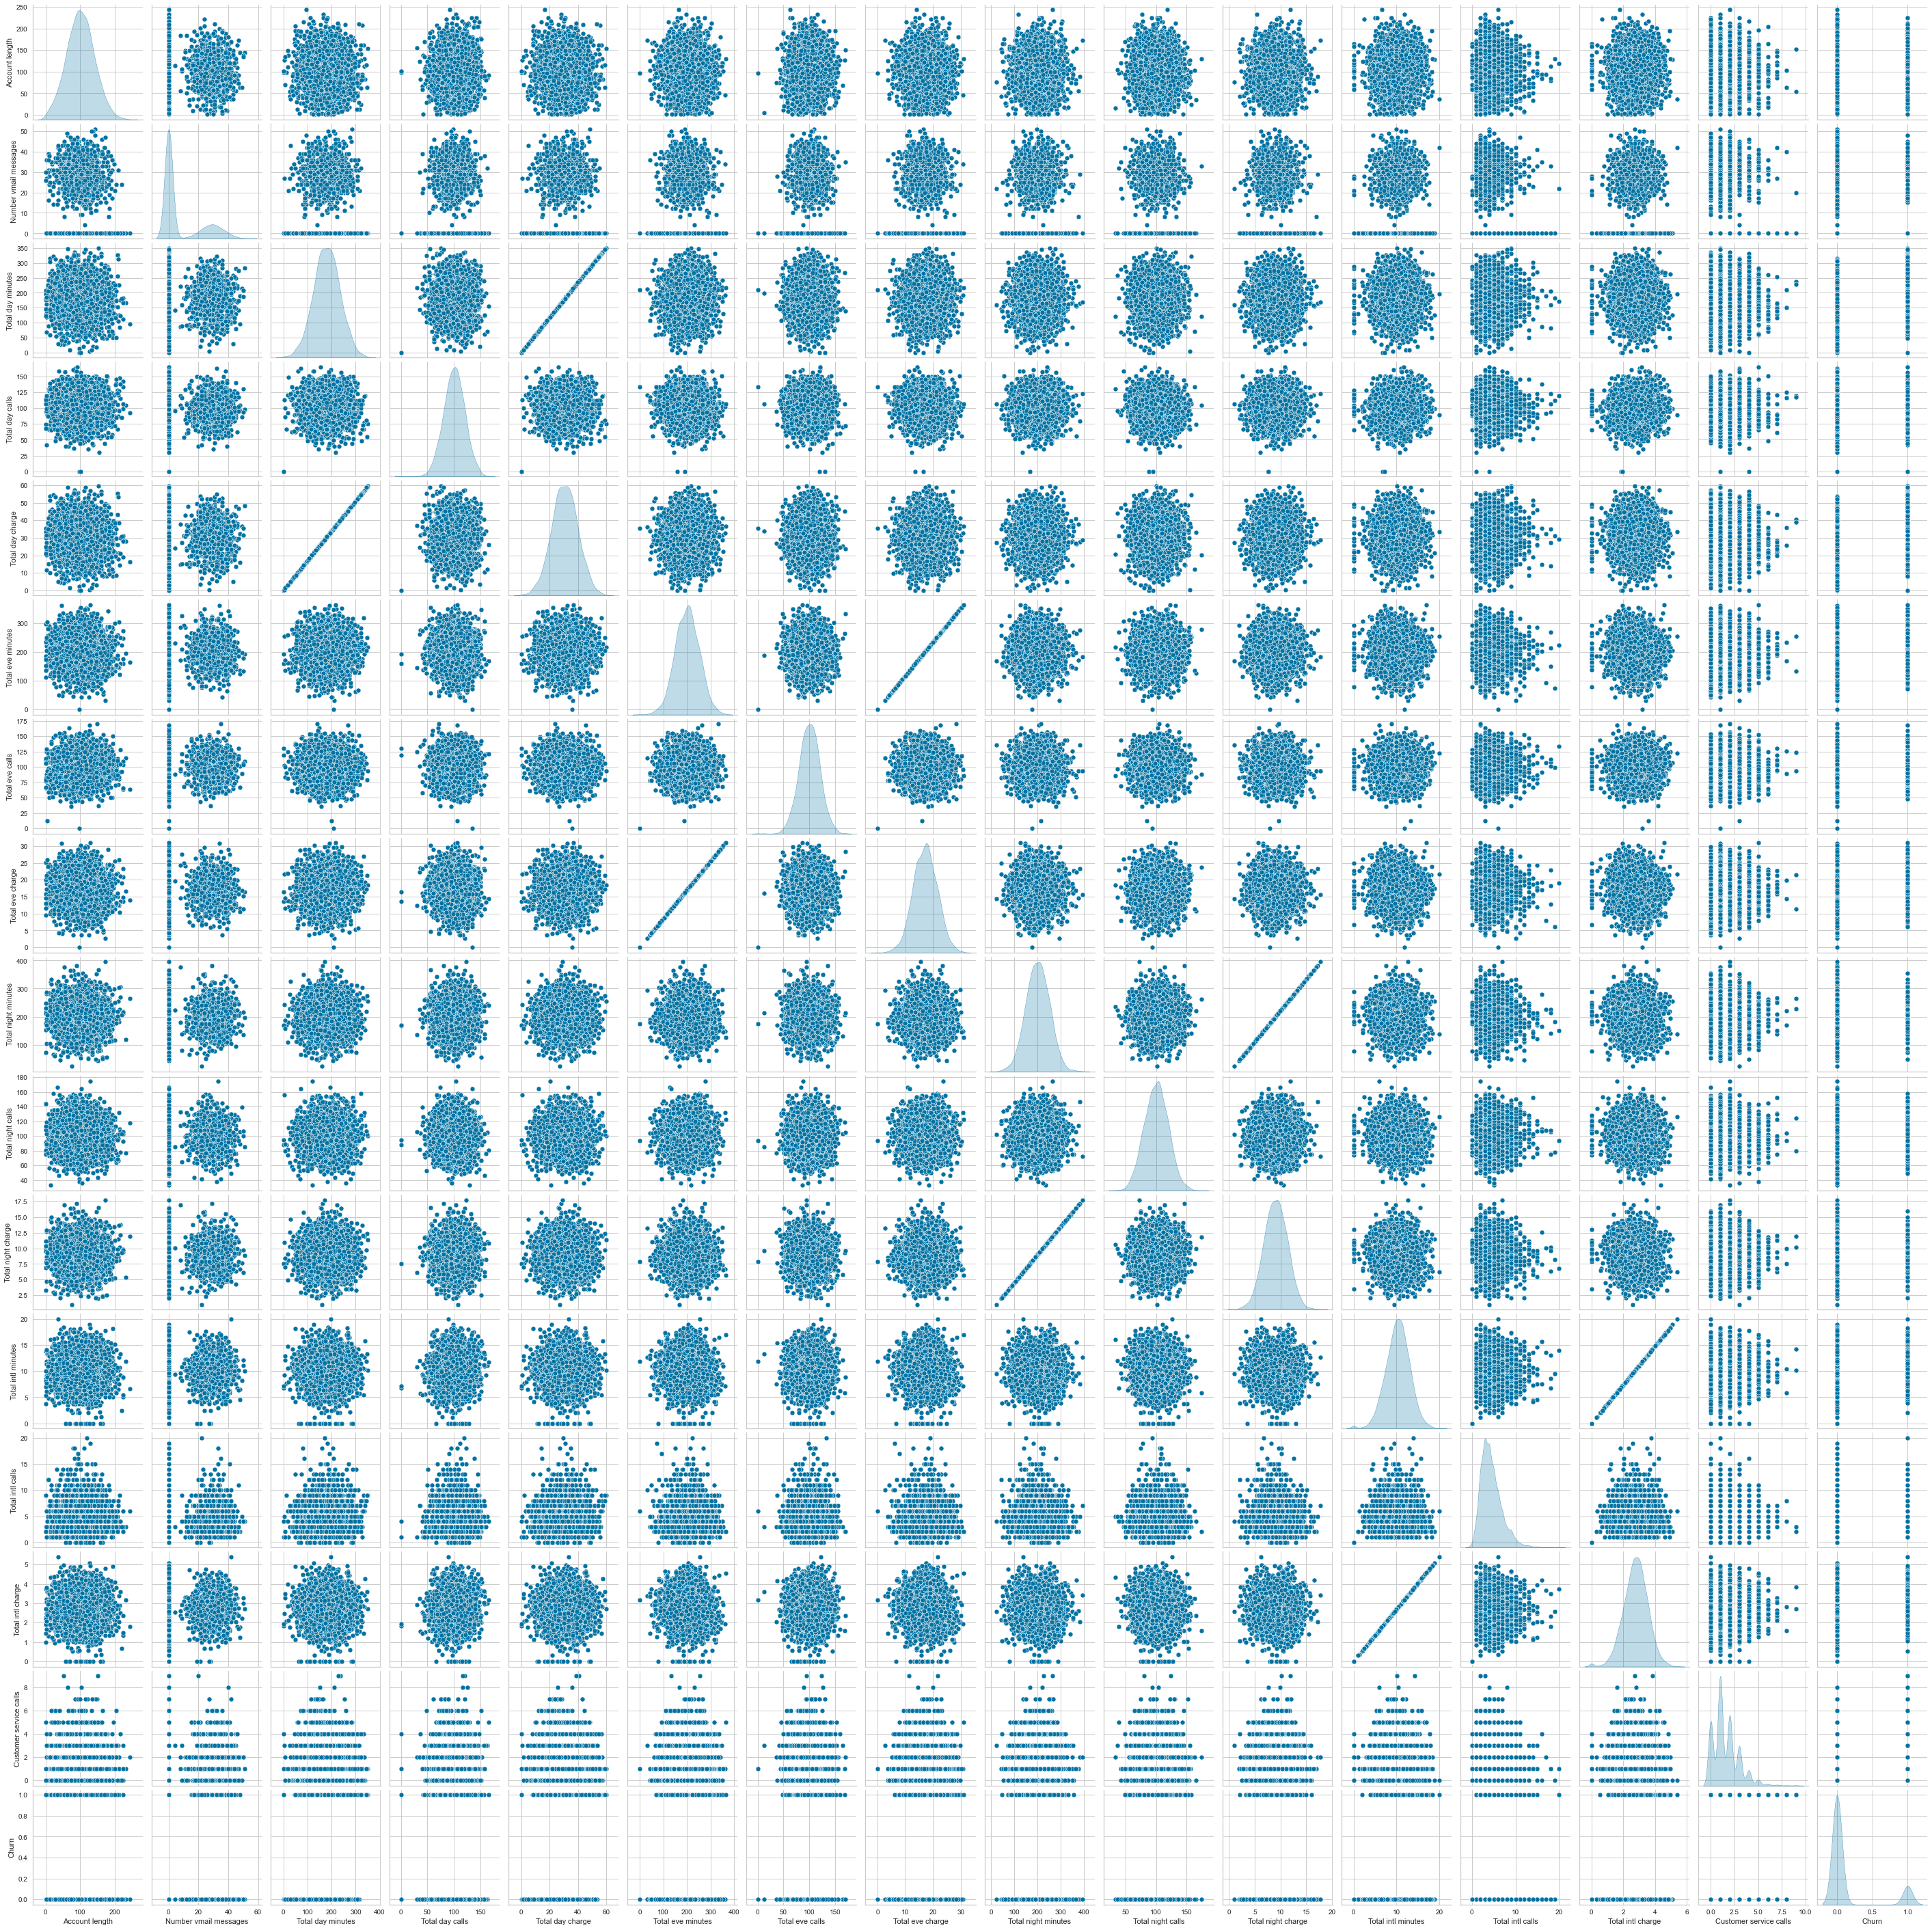

In [26]:
# Separating columns to be visualized
out_cols = list(set(telcom_df .nunique()[telcom_df.nunique()<6].keys().tolist()
                    + telcom_df.select_dtypes(include='object').columns.tolist()))
viz_cols = [x for x in telcom_df.columns if x not in out_cols] + ['Churn']

sns.pairplot(telcom_df[viz_cols], diag_kind="kde")
plt.show()

Several of the numerical data are very correlated. (Total day minutes and Total day charge), (Total eve minutes and Total eve charge), (Total night minutes and Total night charge) and lastly (Total intl minutes and Total intl charge) are alo correlated. We only have to select one of them.

# 3. Data PreProcessing

In [27]:
# Removing correlated and unneccessary columns
col_to_drop = ['State', 'Area code', 'Total day charge', 'Total eve charge', 
               'Total night charge', 'Total intl charge']
   
telcom = telcom_df.drop(columns = col_to_drop, axis = 1)
telcom_test = telcom_test.drop(columns = col_to_drop, axis = 1)

# Target column
target_col = ["Churn"]

# Number of levels in feature to be a categorical feature
nlevels = 6

# Separating categorical and numerical columns

# Categorical columns
cat_cols = list(set(telcom.nunique()[telcom.nunique()<nlevels].keys().tolist() 
                    + telcom.select_dtypes(include='object').columns.tolist()))
cat_cols = [x for x in cat_cols if x not in target_col]

# Numerical columns
num_cols = [x for x in telcom.columns if x not in cat_cols + target_col]
# Binary columns with 2 values
bin_cols = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
# Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

# Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols:
    telcom[i] = le.fit_transform(telcom[i])
    telcom_test[i] = le.transform(telcom_test[i])

# Combining the train and test datasets
trainsize = telcom.shape[0]
comb = pd.concat((telcom, telcom_test), sort=False)

# Duplicating columns for multi value columns
comb = pd.get_dummies(data = comb, columns = multi_cols)

# Separating the train and test datasets
telcom = comb[:trainsize]
telcom_test = comb[trainsize:]

# Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

scaled_test = std.transform(telcom_test[num_cols])
scaled_test = pd.DataFrame(scaled_test, columns=num_cols)

# Dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols, axis = 1)
telcom = telcom.merge(scaled, left_index=True, right_index=True, how = "left")

df_telcom_test_og = telcom_test.copy()
telcom_test = telcom_test.drop(columns = num_cols, axis = 1)
telcom_test = telcom_test.merge(scaled_test, left_index=True, right_index=True, how = "left")

### 3.1 Variable summary

In [28]:
summary = (df_telcom_og[[i for i in df_telcom_og.columns]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(), 
                                line = dict(color = ['#506784']), 
                                fill = dict(color = ['#119DFF']),),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])),
                  columnwidth = [200,60,100,100,60,60,80,80,80])

layout = go.Layout(dict(title = "Training variable Summary"))
figure = go.Figure(data=[trace], layout=layout)

py.iplot(figure)

### 3.2 Correlation matrix

In [29]:
# Correlation
correlation = telcom.corr()
# Tick labels
matrix_cols = correlation.columns.tolist()
# Convert to array
corr_array = np.array(correlation)

# Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar = dict(title = "Pearson Correlation coefficients", titleside = "right"),)

layout = go.Layout(dict(title = "Correlation matrix",
                        autosize = False,
                        height = 720,
                        width = 800,
                        margin = dict(r = 0, l = 210, t = 25, b = 210),
                        yaxis = dict(tickfont = dict(size = 9)),
                        xaxis = dict(tickfont = dict(size = 9))))

data = [trace]
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

### 3.3 Visualizing data with principal components

In [30]:
def pca_scatter(pcadf, targetfeature, targetlabel, color):
    tracer = go.Scatter(x = pcadf[pcadf[targetfeature]==targetlabel]["PC1"],
                        y = pcadf[pcadf[targetfeature]==targetlabel]["PC2"],
                        name = targetlabel, mode = "markers",
                        marker = dict(color = color, line = dict(width = .5), symbol = "diamond-open"),)
    return tracer

In [31]:
pca = PCA(n_components = 2)

X = telcom[[i for i in telcom.columns if i not in target_col]]
Y = telcom[target_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components, columns = ["PC1", "PC2"])
pca_data = pca_data.merge(Y, left_index=True, right_index=True, how="left")
pca_data["Churn"] = pca_data["Churn"].replace({1: "Churn", 0: "Not churn"})

layout = go.Layout(dict(title = "Visualizing data with PCA", plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)', title = "first principal component (PC1)",
                                zerolinewidth=1, ticklen=5, gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)', title = "second principal component (PC2)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2), height = 400))

trace1 = pca_scatter(pca_data, 'Churn', 'Churn', 'red')
trace2 = pca_scatter(pca_data, 'Churn', 'Not churn', 'royalblue')

data = [trace2, trace1]
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

### 3.4 Binary variable distribution in customer churn (Radar Chart)

In [32]:
def plot_radar(df, aggregate, title):
    data_frame = df[df["Churn"] == aggregate] 
    data_frame_x = data_frame[bi_cs].sum().reset_index()
    data_frame_x.columns = ["feature", "yes"]
    data_frame_x["no"] = data_frame.shape[0] - data_frame_x["yes"]
    data_frame_x = data_frame_x[data_frame_x["feature"] != "Churn"]
    
    # Count of 1's (yes)
    trace1 = go.Scatterpolar(r = data_frame_x["yes"].values.tolist(), theta = data_frame_x["feature"].tolist(),
                             fill = "toself", name = "count of 1's", mode = "markers+lines", marker = dict(size = 5))
    
    # Count of 0's (no)
    trace2 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(), theta = data_frame_x["feature"].tolist(),
                             fill = "toself", name = "count of 0's", mode = "markers+lines", marker = dict(size = 5))
    
    layout = go.Layout(dict(polar = dict(radialaxis = dict(visible = True, side = "counterclockwise", showline = True,
                                                           linewidth = 2, tickwidth = 2, gridcolor = "white", gridwidth = 2),
                                         angularaxis = dict(tickfont = dict(size = 10), layer = "below traces"),
                                         bgcolor = "rgb(243,243,243)",), paper_bgcolor = "rgb(243,243,243)",
                                         title = title, height = 600, width = 600))
    
    
    data = [trace2, trace1]
    fig = go.Figure(data=data, layout=layout)
    
    py.iplot(fig)

In [33]:
# Separating binary columns
bi_cs = telcom.nunique()[telcom.nunique() == 2].keys()
dat_rad = telcom[bi_cs]

# Plotting radar chart for churn and not churn customers (binary variables)
plot_radar(dat_rad, 1, "Churn customers")
plot_radar(dat_rad, 0, "Not churn customers")

# 4. Model Building

In [34]:
def telecom_churn_prediction(algorithm, training_x, testing_x, training_y, testing_y, cf, threshold_plot):
    # Model
    algorithm.fit(training_x, training_y)
    predictions = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
        
    print('Algorithm:', type(algorithm).__name__)
    print("\nClassification report:\n", classification_report(testing_y, predictions))
    print("Accuracy Score:", accuracy_score(testing_y, predictions))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    
    # roc_auc_score
    model_roc_auc = roc_auc_score(testing_y, predictions) 
    print("Area under curve:", model_roc_auc,"\n")
    
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:,1])
     
    # Plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix,
                        x = ["Not churn", "Churn"],
                        y = ["Not churn", "Churn"],
                        showscale = False, colorscale = "Picnic",
                        name = "Confusion matrix")
    
    # Plot roc curve
    trace2 = go.Scatter(x = fpr, y = tpr, name = "Roc: " + str(model_roc_auc), 
                        line = dict(color = ('rgb(22, 96, 167)'), width = 2))
    
    trace3 = go.Scatter(x = [0,1], y = [0,1],
                        line = dict(color = ('rgb(205, 12, 24)'), width = 2, dash = 'dot'))
    
    if cf in ['coefficients', 'features']:
        if cf == 'coefficients':
            coefficients = pd.DataFrame(algorithm.coef_.ravel())
        elif cf == 'features':
            coefficients = pd.DataFrame(algorithm.feature_importances_)
        
        column_df = pd.DataFrame(training_x.columns.tolist())
        coef_sumry = (pd.merge(coefficients, column_df, left_index=True, right_index=True, how="left"))
        coef_sumry.columns = ["coefficients", "features"]
        coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending=False)
        
        # Plot coeffs
        trace4 = go.Bar(x = coef_sumry["features"], y = coef_sumry["coefficients"], name = "coefficients",
                        marker = dict(color = coef_sumry["coefficients"], colorscale = "Picnic", 
                                      line = dict(width = .6, color = "black")))
        
        # Subplots
        fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]], subplot_titles=('Confusion matrix',
                                'Receiver operating characteristic', 'Feature importances'))
        
        fig.append_trace(trace1, 1, 1)
        fig.append_trace(trace2, 1, 2)
        fig.append_trace(trace3, 1, 2)
        fig.append_trace(trace4, 2, 1)
        fig['layout'].update(showlegend=False, title="Model performance",
                             autosize=False, height = 900, width = 800,
                             plot_bgcolor = 'rgba(240,240,240, 0.95)',
                             paper_bgcolor = 'rgba(240,240,240, 0.95)',
                             margin = dict(b = 195))
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
        fig["layout"]["xaxis3"].update(dict(showgrid = True, tickfont = dict(size = 10), tickangle = 90))
        
    elif cf == 'None':
        # Subplots
        fig = make_subplots(rows=1, cols=2,
                            subplot_titles=('Confusion matrix', 'Receiver operating characteristic'))
        fig.append_trace(trace1, 1, 1)
        fig.append_trace(trace2, 1, 2)
        fig.append_trace(trace3, 1, 2)
        fig['layout'].update(showlegend=False, title="Model performance", autosize=False, height = 500, width = 800,
                         plot_bgcolor = 'rgba(240,240,240,0.95)', paper_bgcolor = 'rgba(240,240,240,0.95)',
                         margin = dict(b = 195))
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))  
        
    py.iplot(fig)
    
    if threshold_plot == True: 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x, training_y)
        visualizer.poof()

In [35]:
# Defining the studied or used independent features (columns) as well the target  
cols = [i for i in telcom.columns if i not in target_col]
target_col = ['Churn']

# Splitting the principal training dataset to subtrain and subtest datasets
x_train, x_test, y_train, y_test = train_test_split(telcom[cols], telcom[target_col], test_size = .25, random_state = 111)

# Splitting the no scaled principal training dataset to subtrain and subtest datasets
x_train_og, x_test_og, y_train_og, y_test_og = train_test_split(df_telcom_og[cols], telcom[target_col],
                                                test_size = .25, random_state = 111)

Algorithm: RandomForestClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       717
           1       0.91      0.64      0.75       117

    accuracy                           0.94       834
   macro avg       0.93      0.82      0.86       834
weighted avg       0.94      0.94      0.94       834

Accuracy Score: 0.9412470023980816
Area under curve: 0.8156313700246755 



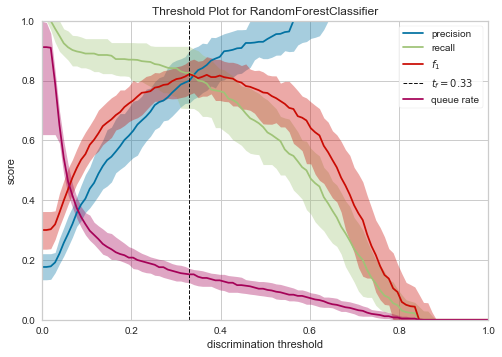

In [36]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 123, max_depth = 9, criterion = "gini")

telecom_churn_prediction(rfc, x_train, x_test, y_train, y_test, 'features', threshold_plot=True)